In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


payment_method
Cash on Delivery    514
UPI                 511
Name: count, dtype: int64


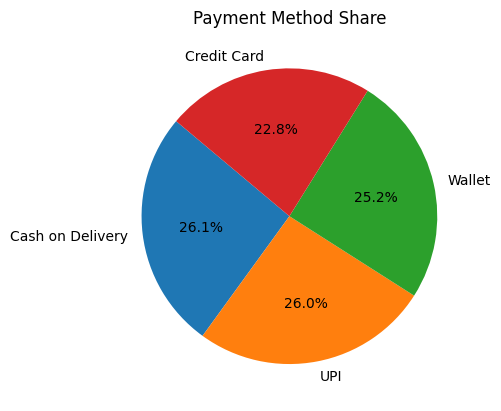

In [3]:
df = pd.read_csv('DA314_S4_OrderDetails_Data_Concept.csv')
payment_counts = df['payment_method'].value_counts()
print(payment_counts.head(2))
plt.pie(payment_counts , labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Payment Method Share')
plt.show()

C:\Users\Haani\AppData\Local\Temp\ipykernel_7780\3626017403.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_total.values,y=city_total.index,palette='magma',edgecolor='black')


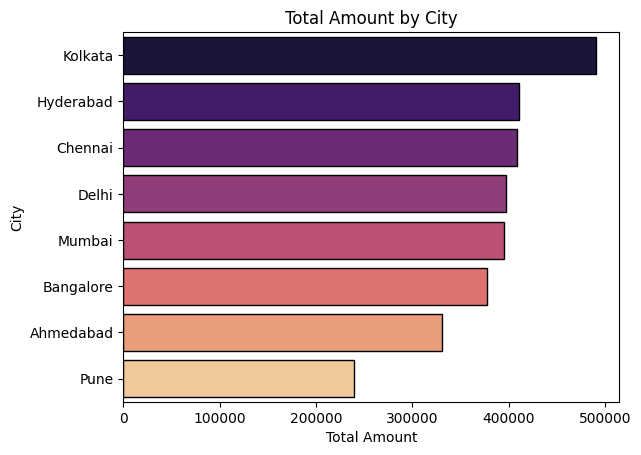

In [4]:
city_total = df.groupby('city_user')['total_amount'].sum().sort_values(ascending=False)
sns.barplot(x=city_total.values,y=city_total.index,palette='magma',edgecolor='black')
plt.title('Total Amount by City')
plt.xlabel('Total Amount')
plt.ylabel('City')
plt.show()

<Axes: xlabel='order_date'>

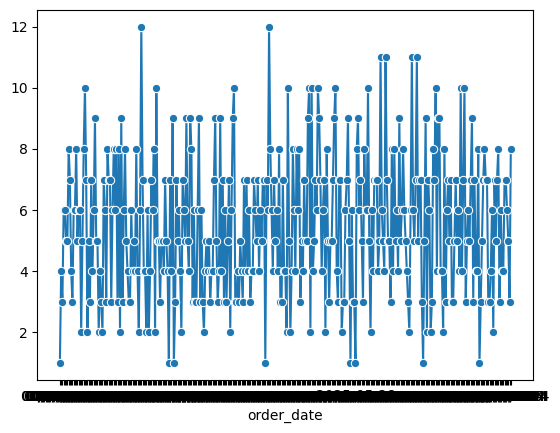

In [5]:
Total_orders = df.groupby('order_date')['order_id'].nunique()
sns.lineplot(x=Total_orders.index, y=Total_orders.values, marker='o')

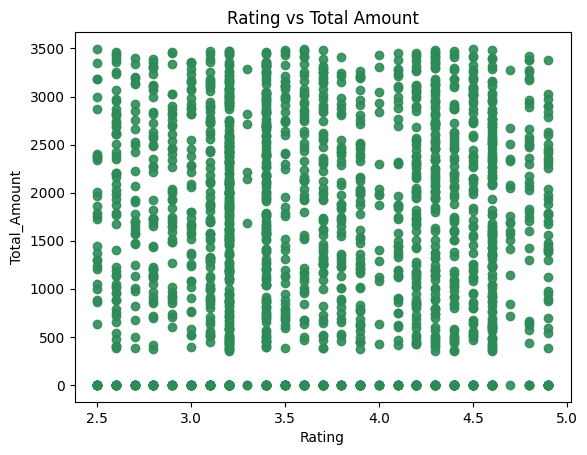

In [6]:
plt.scatter(df['rating'],df['total_amount'], color='seagreen', alpha=0.9)
plt.title('Rating vs Total Amount')
plt.xlabel('Rating')
plt.ylabel('Total_Amount')
plt.show()

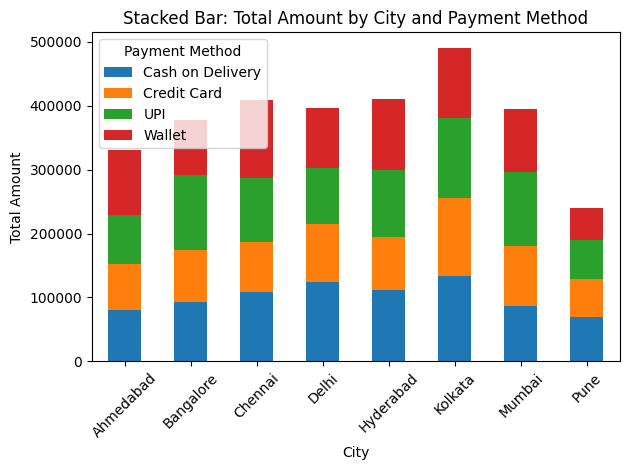

In [7]:
# Create pivot table for stacked bar plot
stacked_data = df.pivot_table(index='city_restaurant', 
							 columns='payment_method', 
							 values='total_amount', 
							 aggfunc='sum')

# Create stacked bar plot
stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar: Total Amount by City and Payment Method')
plt.xlabel('City')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

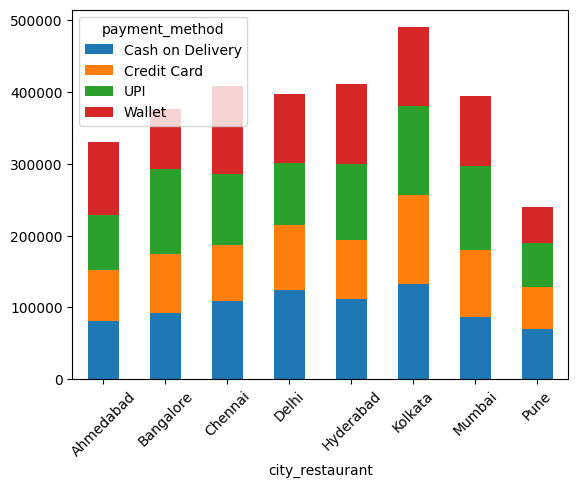

In [8]:
stacked = (df.groupby(['city_restaurant','payment_method'])['total_amount'].sum().unstack())
stacked.plot(kind='bar',stacked=True)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='city_restaurant'>

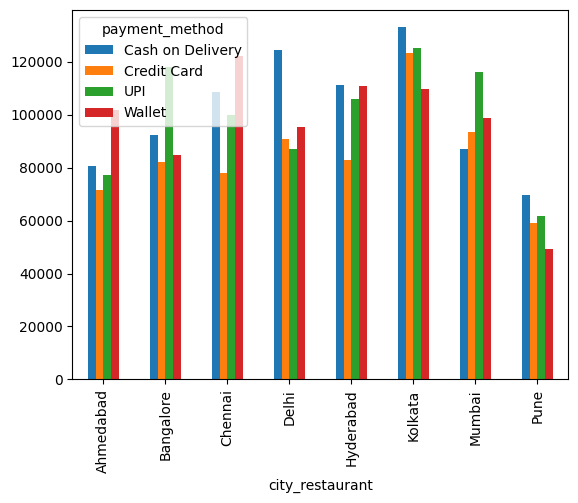

In [9]:
stacked.plot(kind='bar',stacked=False)


Text(0, 0.5, 'Frequency')

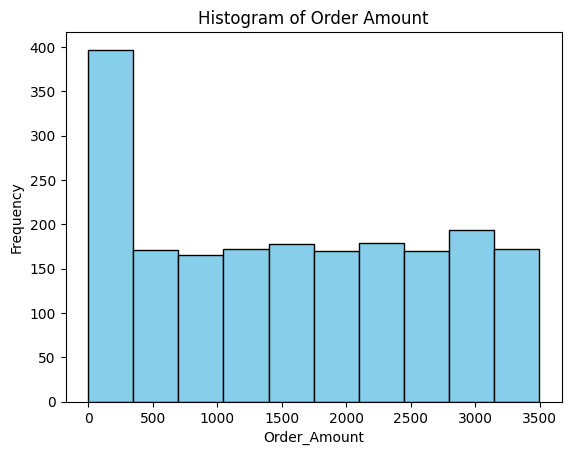

In [10]:
plt.hist(df['total_amount'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Order Amount')
plt.xlabel('Order_Amount')
plt.ylabel('Frequency')

Text(0.5, 0, 'Order_Amount')

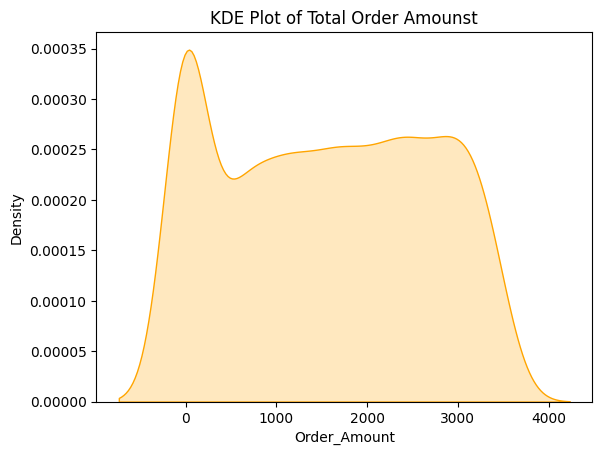

In [11]:
#KDE plot
sns.kdeplot(df['total_amount'], color='orange',fill=True)
plt.title('KDE Plot of Total Order Amounst')
plt.xlabel('Order_Amount')

C:\Users\Haani\AppData\Local\Temp\ipykernel_7780\1640750357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city_user', y='delivery_time_min', data=df, palette=custom_palette)


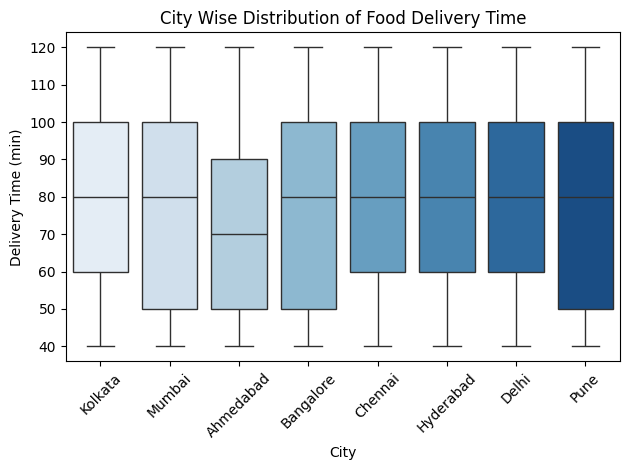

In [22]:
n_cities = len(df['city_user'].unique())
custom_palette = sns.color_palette('Blues', n_colors=n_cities) 
sns.boxplot(x='city_user', y='delivery_time_min', data=df, palette=custom_palette)
plt.title('City Wise Distribution of Food Delivery Time')
plt.xlabel('City')
plt.ylabel('Delivery Time (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

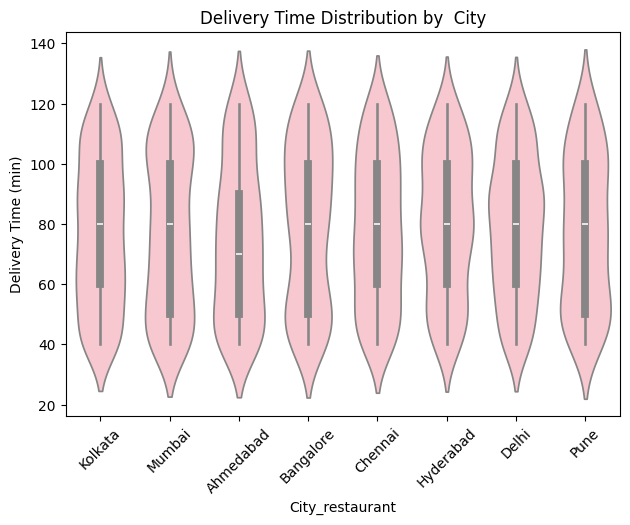

In [30]:
sns.violinplot(x='city_restaurant', y='delivery_time_min', color= 'pink',data=df )
plt.title('Delivery Time Distribution by  City')
plt.xlabel('City_restaurant')
plt.ylabel('Delivery Time (min)')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

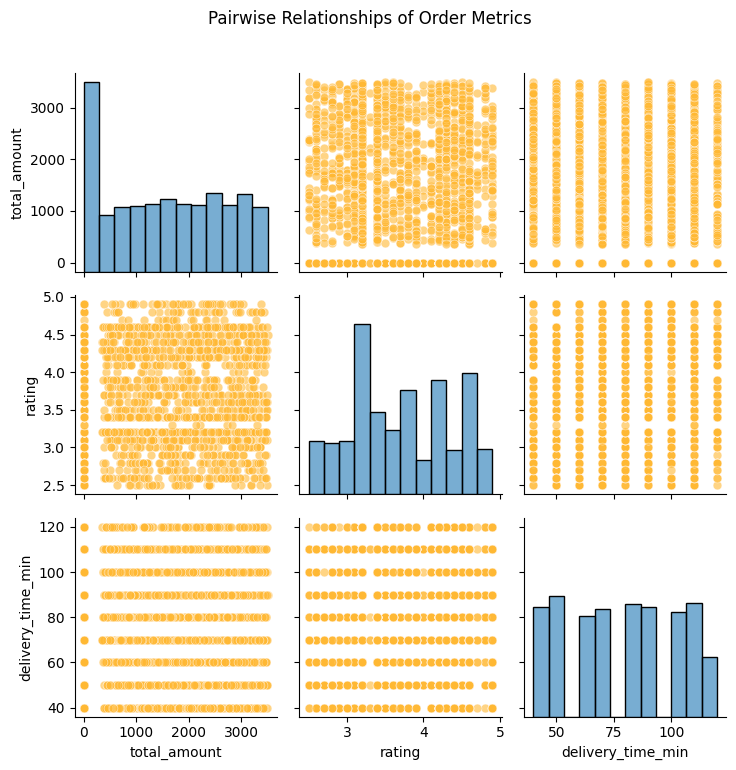

In [36]:
cols = ['total_amount', 'rating','delivery_time_min']

g = sns.pairplot(df[cols], kind='scatter', diag_kind='hist',
                 plot_kws={'alpha':0.6, 's':40,'color':"#FFB833"},
                 diag_kws={'bins':12, 'alpha':0.6})
g.fig.suptitle('Pairwise Relationships of Order Metrics', y=1.02)
plt.tight_layout()
plt.show()

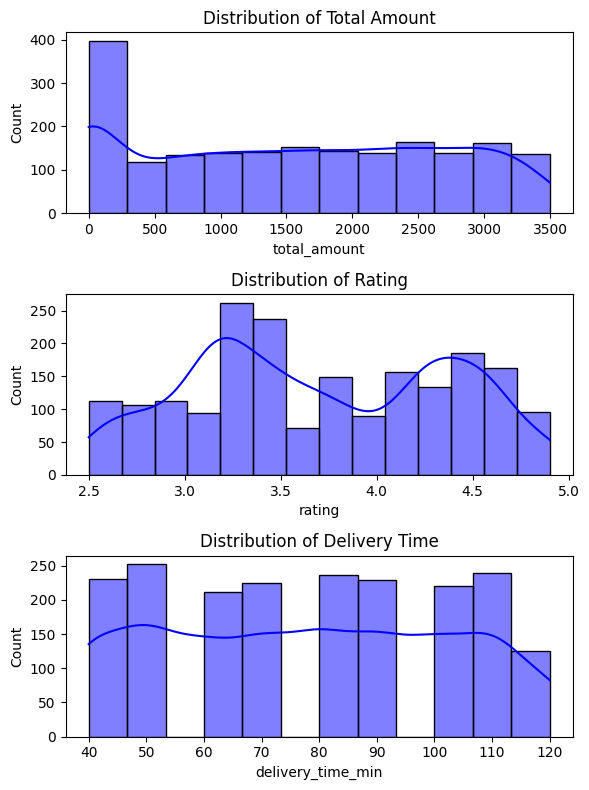

In [ ]:
fig , axes = plt.subplots(3 , 1)

sns.histplot(df['total_amount'] , kde = True , ax = axes[0] , bins= 12)
axes[0].set_title("Distribution of Total Amount")
axes[0].set_xlabel("Total Amount")
axes[0].set_ylabel("count")

sns.histplot(df['rating'] , kde=True , ax = axes[1] , bins= 12)
axes[1].set_title("Distribution of Ratings")
axes[1].set_xlabel("Ratings")
axes[1].set_ylabel("count")

sns.histplot(df['delivery_time_min'] , kde=True , ax = axes[2] , bins= 12)
axes[2].set_title("Distribution of Delivery Time")
axes[2].set_xlabel("Delivery Time")
axes[2].set_ylabel("count")

plt.tight_layout()